<a href="https://colab.research.google.com/github/Angeldahal/Movie-rec-sys/blob/main/Recommender%20TMDb%20top%2010000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [3]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [8]:
!kaggle datasets download -d sankha1998/tmdb-top-10000-popular-movies-dataset



  0% 0.00/1.31M [00:00<?, ?B/s]
100% 1.31M/1.31M [00:00<00:00, 81.2MB/s]


In [9]:
!ls


amazon-music-reviews.zip
amazon-reviews-sentiment-analysis.ipynb
kaggle.json
Musical_Instruments_5.json
Musical_instruments_reviews.csv
tmdb-top-10000-popular-movies-dataset.zip


In [10]:
!unzip \*.zip && rm *.zip

Archive:  amazon-music-reviews.zip
replace Musical_Instruments_5.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Musical_Instruments_5.json  
replace Musical_instruments_reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Musical_instruments_reviews.csv  

Archive:  tmdb-top-10000-popular-movies-dataset.zip
  inflating: TMDb_updated.CSV        

2 archives were successfully processed.


In [11]:
!ls


amazon-reviews-sentiment-analysis.ipynb  Musical_instruments_reviews.csv
kaggle.json				 TMDb_updated.CSV
Musical_Instruments_5.json


## Starting of the Actual Code

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics.pairwise import linear_kernel

In [14]:
df = pd.read_csv("./TMDb_updated.CSV")
df.head()

,Unnamed: 0,title,overview,original_language,vote_count,vote_average
0,0,Ad Astra,"The near future, a time when both hope and har...",en,2853,5.9
1,1,Bloodshot,"After he and his wife are murdered, marine Ray...",en,1349,7.2
2,2,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,en,2530,7.1
3,3,Ant-Man,Armed with the astonishing ability to shrink i...,en,13611,7.1
4,4,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",en,3542,5.9


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   title              10000 non-null  object 
 2   overview           10000 non-null  object 
 3   original_language  10000 non-null  object 
 4   vote_count         10000 non-null  int64  
 5   vote_average       10000 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 468.9+ KB


In [16]:
df["overview"]= df["overview"].fillna("")

In [18]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [19]:
df.head()

,title,overview,original_language,vote_count,vote_average
0,Ad Astra,"The near future, a time when both hope and har...",en,2853,5.9
1,Bloodshot,"After he and his wife are murdered, marine Ray...",en,1349,7.2
2,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,en,2530,7.1
3,Ant-Man,Armed with the astonishing ability to shrink i...,en,13611,7.1
4,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",en,3542,5.9


## Exploratory Data Analysis

In [20]:
sorted_df = df.sort_values('vote_average', ascending=False)

In [21]:
top_10_movies = sorted_df.head(10)

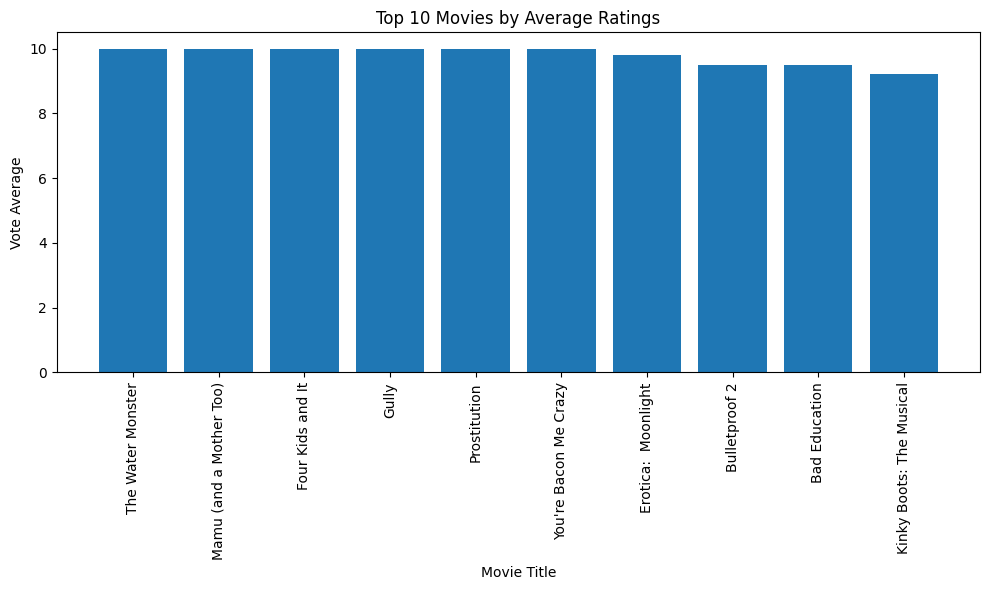

In [23]:
plt.figure(figsize=(10, 6))

plt.bar(top_10_movies['title'], top_10_movies['vote_average'])
plt.xlabel('Movie Title')
plt.ylabel('Vote Average')
plt.title('Top 10 Movies by Average Ratings')

plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

### On the basis of total votes count

In [32]:
popular_df = df.sort_values('vote_count', ascending=False)

top_10_popular = popular_df.head(10)

In [33]:
top_10_popular

,title,overview,original_language,vote_count,vote_average
80,Inception,"Cobb, a skilled thief who commits corporate es...",en,25148,8.3
128,Deadpool,Deadpool tells the origin story of former Spec...,en,22225,7.6
86,The Avengers,When an unexpected enemy emerges and threatens...,en,21893,7.7
47,Interstellar,Interstellar chronicles the adventures of a gr...,en,21589,8.3
88,The Dark Knight,Batman raises the stakes in his war on crime. ...,en,21561,8.4
132,Avatar,"In the 22nd century, a paraplegic Marine is di...",en,20778,7.4
402,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",en,20132,7.9
243,Fight Club,A ticking-time-bomb insomniac and a slippery s...,en,18664,8.4
216,Pulp Fiction,"A burger-loving hit man, his philosophical par...",en,18003,8.5
396,Django Unchained,"With the help of a German bounty hunter, a fre...",en,17864,8.1


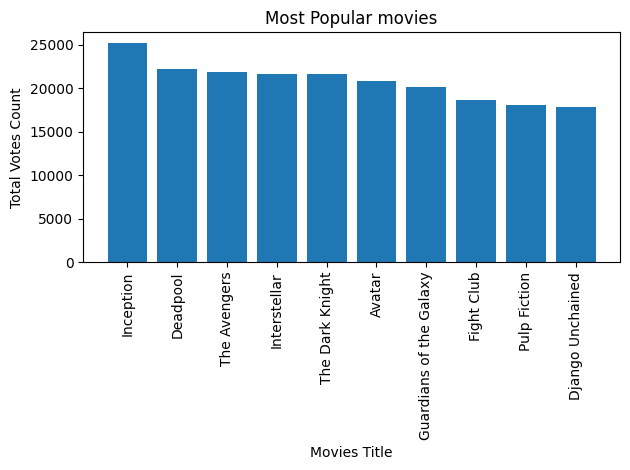

In [34]:
plt.bar(top_10_popular["title"], top_10_popular["vote_count"])

plt.xlabel("Movies Title")
plt.ylabel("Total Votes Count")
plt.title("Most Popular movies")

plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

In [39]:
df.original_language.value_counts()

en    8326
fr     385
ja     269
it     152
es     145
de      96
ko      92
cn      72
zh      71
hi      70
ru      69
da      32
sv      30
pt      22
id      21
ta      18
nl      13
no      13
tr      12
pl      10
tl       9
th       9
ar       6
sr       6
te       5
fa       5
cs       4
ml       4
he       4
fi       3
hu       3
af       2
el       2
ro       2
ab       1
lv       1
mr       1
ka       1
ms       1
vi       1
et       1
eu       1
sh       1
bs       1
nb       1
pa       1
la       1
is       1
xx       1
mk       1
sq       1
uk       1
Name: original_language, dtype: int64

## Content Based Filtering

In [41]:
cbf_df = df[['title', 'overview']]
cbf_df

,title,overview
0,Ad Astra,"The near future, a time when both hope and har..."
1,Bloodshot,"After he and his wife are murdered, marine Ray..."
2,Bad Boys for Life,Marcus and Mike are forced to confront new thr...
3,Ant-Man,Armed with the astonishing ability to shrink i...
4,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ..."
...,...,...
9995,Cargo,The story of CARGO takes place on rusty space-...
9996,The Good Night,"Gary, a musician, is trapped in an unhappy rel..."
9997,The World Is Yours,"To escape his life of crime, a Paris drug deal..."
9998,The Grand Seduction,A small fishing village must procure a local d...


### TF-IDF Vectorizer

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english")

tfidf_matrix = vectorizer.fit_transform(cbf_df["overview"])


In [46]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [50]:
def get_recommendations(title, df=cbf_df, cosine_sim=cosine_sim, top_n=5):

  indices = pd.Series(df.index, index=df["title"]).drop_duplicates()

  movie_index = indices[title]

  similarity_scores = list(enumerate(cosine_sim[movie_index]))

  similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

  top_movie_indices = [i[0] for i in similarity_scores[1:top_n+1]]

  return cbf_df['title'].iloc[top_movie_indices]

In [52]:
recommendations = get_recommendations("The Dark Knight", top_n=10)
recommendations

375                       The Dark Knight Rises
685                              Batman Returns
9675                        Batman vs. Two-Face
2252                 Batman: Under the Red Hood
1234                             Batman Forever
2855                   Batman: The Killing Joke
976     Batman: The Dark Knight Returns, Part 2
6392                 Batman: Gotham by Gaslight
6220           LEGO DC: Batman - Family Matters
5441                           Batman: Year One
Name: title, dtype: object

## Using Count Vectorizer

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words="english")

count_matrix = count_vectorizer.fit_transform(cbf_df["overview"])

cosine_sim_count = linear_kernel(count_matrix, count_matrix)

In [56]:
recommendations = get_recommendations("The Dark Knight", cosine_sim=cosine_sim_count, top_n=10)
recommendations

375                       The Dark Knight Rises
685                              Batman Returns
1234                             Batman Forever
2252                 Batman: Under the Red Hood
5441                           Batman: Year One
4259                                 The Rookie
6220           LEGO DC: Batman - Family Matters
870     Batman: The Dark Knight Returns, Part 1
1640                      The Lego Batman Movie
6315               Batman: Mask of the Phantasm
Name: title, dtype: object

### Word2Vec Vectorizer(Failed to give Proper Recommendations)

In [70]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import euclidean_distances

sentences = [plot.split() for plot in cbf_df["overview"]]

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [76]:
def get_recommendations_word2vec(title, model=model, df=cbf_df, top_n=10):
  input_plot = df.loc[df['title'] == title, 'overview'].values[0]
  input_tokens = input_plot.split()

  input_embedding = sum(model.wv[word] for word in input_tokens) / len(input_tokens)

  similarity_scores = []
  for index, row in df.iterrows():
      plot_tokens = row['overview'].split()
      if len(plot_tokens) > 0:
        plot_embedding = sum(model.wv[word] for word in plot_tokens) / len(plot_tokens)
        distance = euclidean_distances([input_embedding], [plot_embedding])
        similarity_scores.append(distance[0][0])

  similarity_scores = np.array(similarity_scores)
  top_movie_indices = similarity_scores.argsort()[:top_n]

  return df['title'].iloc[top_movie_indices]

In [78]:
recommendations = get_recommendations_word2vec("Avengers: Age of Ultron")
recommendations

133                            Deadpool 2
3400              The Thomas Crown Affair
8403                        Then Came You
1505                          Point Break
65                               Geostorm
5223               Beauty & the Briefcase
4304    Harold & Kumar Go to White Castle
5824                              Firefox
5416                         Ginger Snaps
2392              The Autopsy of Jane Doe
Name: title, dtype: object